# Criteria
1. Clearly defined business goal of the project and supporting objectives (10 pts)
2. Demonstration of application of complete machine learning workflow (except deployment part ) (45):
    1. Data ingestion,
    2. Exploratory data analysis and visualization, 
    3. Pre-processing, 
    4. Modelling (including implementation of the best practices , and model evaluation).
3. Automation of the whole workflow (pipeline) (15) 
4. Implementation of best practices for coding and code-documentation (25 pts)
5. Proper references and citations (5 pts)

In [1]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
%matplotlib inline

### 1. Data ingestion

In [ ]:
from pathlib import Path

path = Path("./prediction.ipynb")
abs_path = str(path.parent.absolute())
index = [i for i, e in enumerate(abs_path) if e == "\\"]      
parent_path = abs_path[:index[-2]]
train_path = parent_path + "/data/raw/train.csv"
test_path = parent_path + "/data/raw/test.csv"

In [2]:
data = pd.read_csv(train_path)
final_test = pd.read_csv(test_path)

### 2. Exploratory data analysis and visualization

In [3]:
print(data.shape)
print(final_test.shape)

(1460, 81)
(1459, 80)


In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# check data type of all the variables and if there are any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<font size=3>Obviously some features have many missing values. I'll deal with them later.

In [6]:
# Target is'SalePrice' column. Let's check it.
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

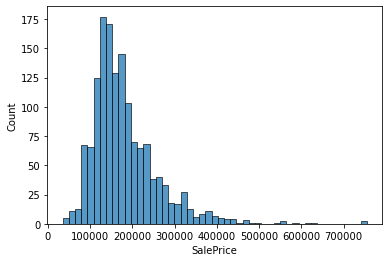

In [7]:
sns.histplot(data['SalePrice'])

In [8]:
data['SalePrice'].skew()

1.8828757597682129

In [9]:
# Smooth the target values. I'm not sure if this is in need.
# https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re#:~:text=Yes%2C%20you%20do%20need%20to,making%20the%20learning%20process%20unstable.
# data['SalePrice'] = np.log1p(data['SalePrice'])

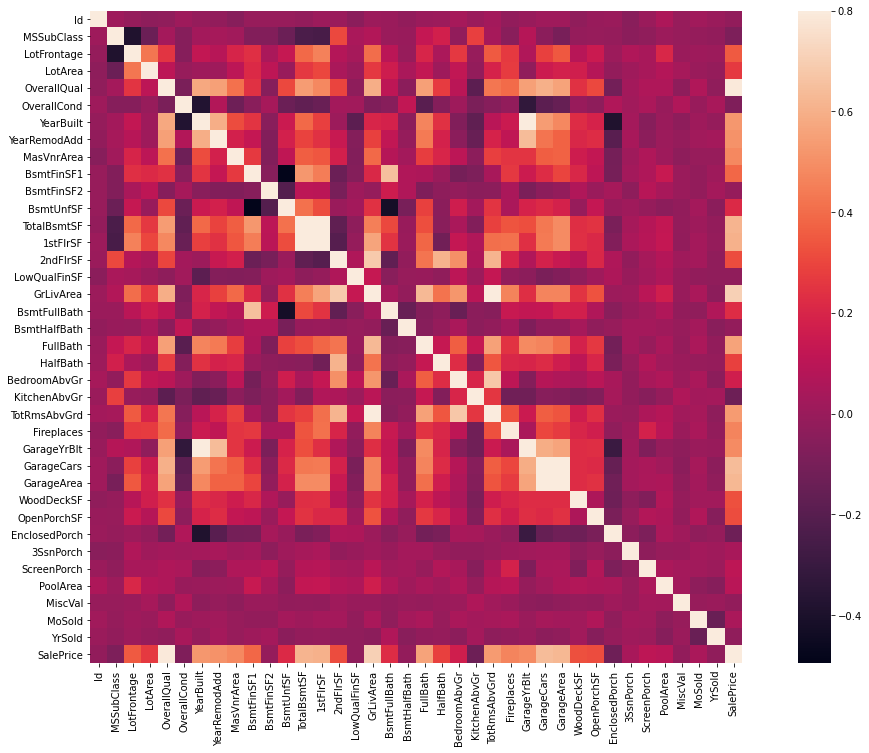

In [10]:
# Check the the correlation between features, especially for the relation between traget and others features.
all_cor = data.corr()
fig, ax = plt.subplots(figsize = (20, 12))
sns.heatmap(all_cor, vmax = 0.8, square = True);

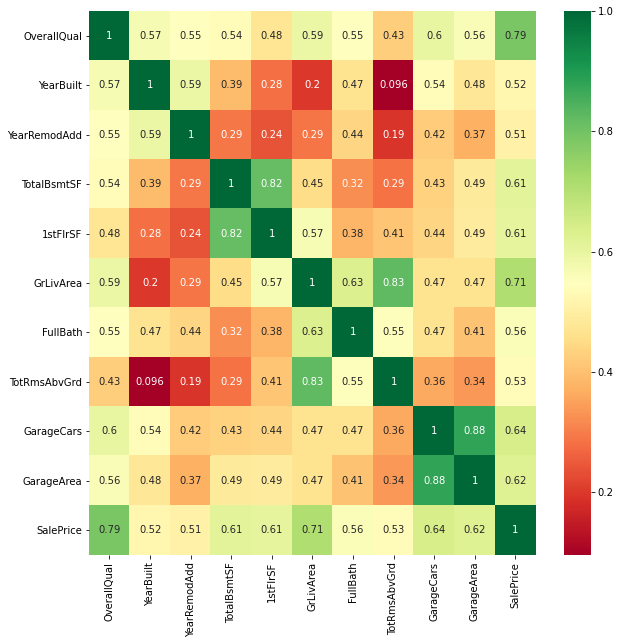

In [11]:
high_cor = data.corr()
high_cor_features = high_cor.index[abs(high_cor["SalePrice"])>0.5]
plt.figure(figsize = (10,10))
ax = sns.heatmap(data[high_cor_features].corr(), annot = True, cmap = "RdYlGn")

In [12]:
data[data.corr().index[abs(data.corr()["SalePrice"])>0.5]].corr()["SalePrice"].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [13]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']
fs = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

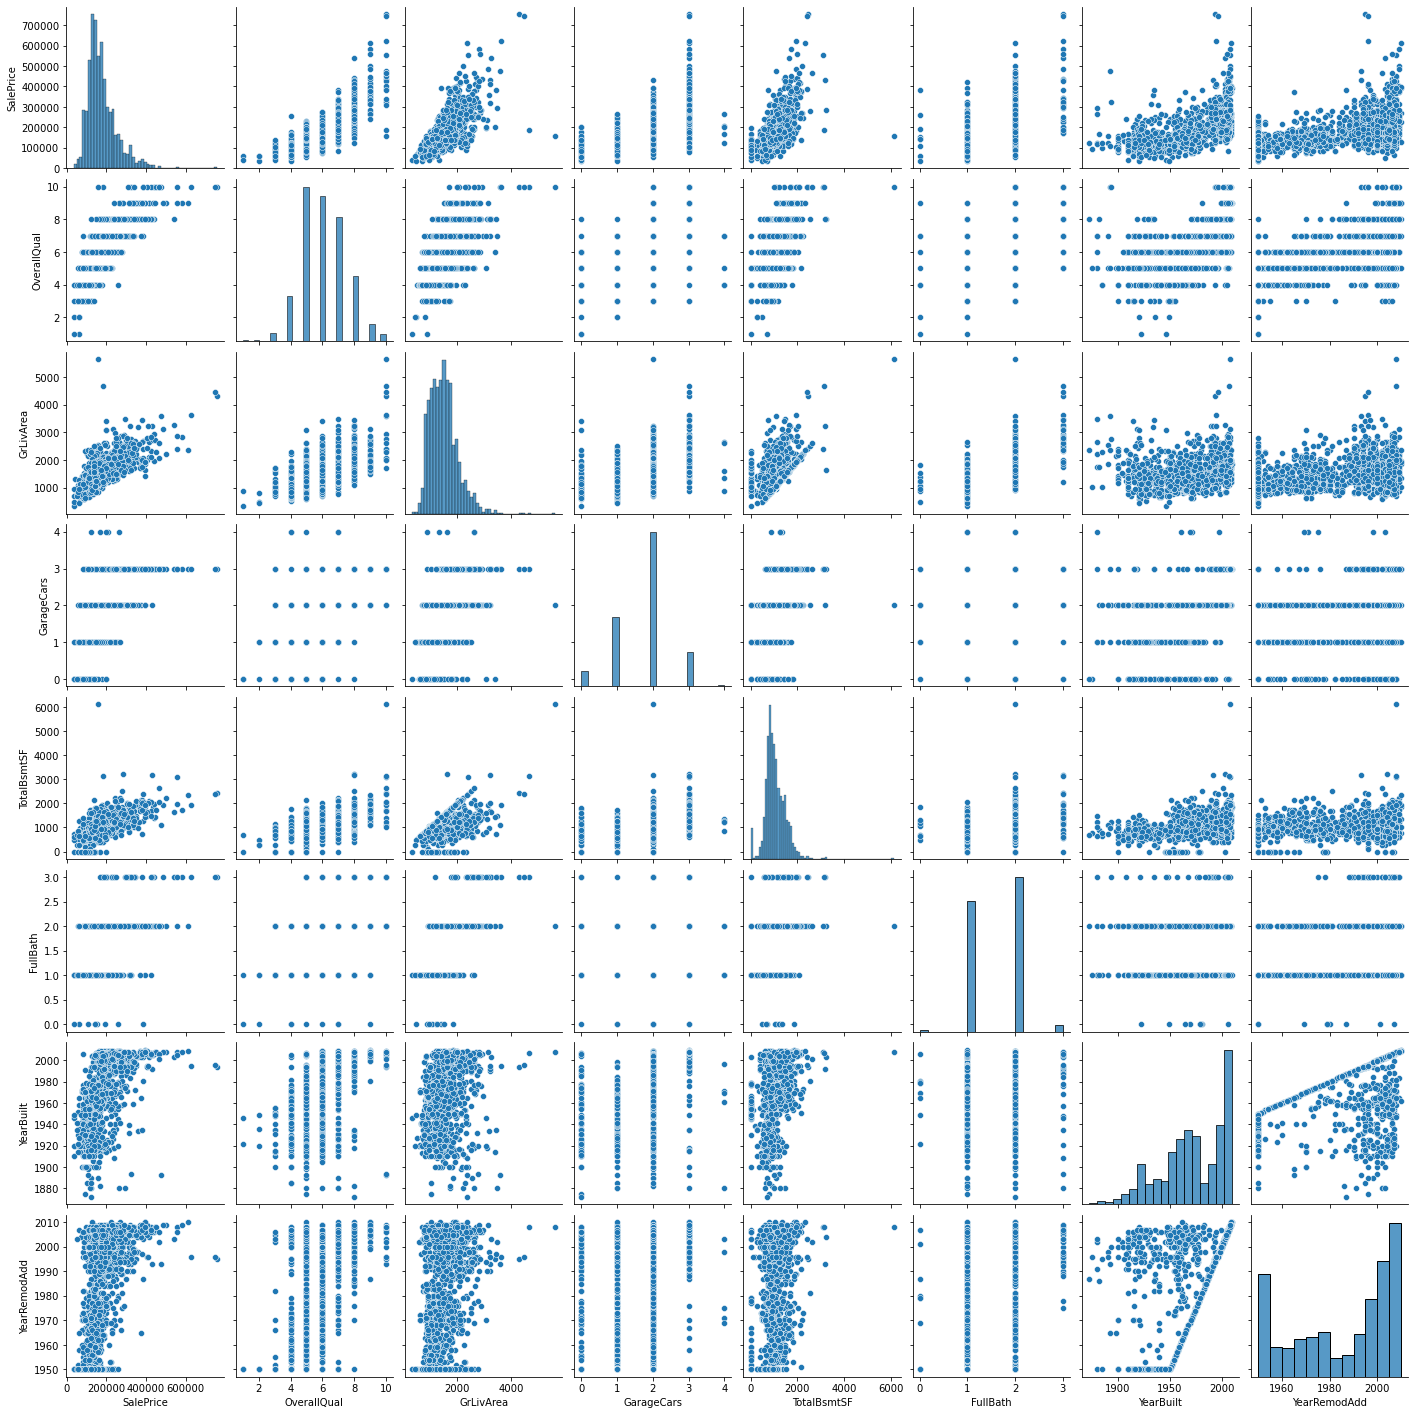

In [14]:
sns.pairplot(data[cols])

### Pre-processing

In [15]:
# According to the analysis abobe, I select following unique features whose correlation is greater than 0.5 with taget: 

# OverallQual      0.790982
# GrLivArea        0.708624
# GarageCars       0.640409
# TotalBsmtSF      0.613581
# FullBath         0.560664
# YearBuilt        0.522897
# YearRemodAdd     0.507101

In [16]:
y = data['SalePrice']
test_id = final_test['Id']
all_data = pd.concat([data, final_test], axis = 0, sort = False)
all_data = all_data[fs]

In [17]:
all_data.isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [18]:
all_data["GarageCars"].head()

0    2.0
1    2.0
2    2.0
3    3.0
4    3.0
Name: GarageCars, dtype: float64

In [19]:
all_data["TotalBsmtSF"].head()

0     856.0
1    1262.0
2     920.0
3     756.0
4    1145.0
Name: TotalBsmtSF, dtype: float64

In [20]:
# Filling the numeric data with mean
# Since pipeline will be used, this cell should be skipped

# numeric_missed = ['TotalBsmtSF','GarageCars']
# for feature in numeric_missed:
#     all_data[feature] = all_data[feature].fillna(np.mean(all_data[feature]))

In [22]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2919 non-null   int64  
 1   GrLivArea     2919 non-null   int64  
 2   GarageCars    2919 non-null   float64
 3   TotalBsmtSF   2919 non-null   float64
 4   FullBath      2919 non-null   int64  
 5   YearBuilt     2919 non-null   int64  
 6   YearRemodAdd  2919 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 182.4 KB


In [23]:
all_data.apply(lambda x: x.skew()).sort_values(ascending=False)

GrLivArea       1.270010
TotalBsmtSF     1.163082
OverallQual     0.197212
FullBath        0.167692
GarageCars     -0.218410
YearRemodAdd   -0.451252
YearBuilt      -0.600114
dtype: float64

In [25]:
# now let's separate the data to its origin (train, test)
data = all_data[:len(y)]
final_test = all_data[len(y):]

In [26]:
data.shape , final_test.shape

((1460, 7), (1459, 7))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.05, random_state = 42)

### Modeling

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

tf_imputer = ColumnTransformer([("imputer", SimpleImputer(missing_values=np.nan, strategy = 'mean'), [0,1,2,3,4,5,6])])

pre_pipeline = Pipeline(steps = ([("tf_imputer", tf_imputer),
                                ('scaler', MinMaxScaler(feature_range = (0,1)))]))

In [29]:
pre_pipeline.get_params(deep = False)

{'memory': None,
 'steps': [('tf_imputer',
   ColumnTransformer(transformers=[('imputer', SimpleImputer(),
                                    [0, 1, 2, 3, 4, 5, 6])])),
  ('scaler', MinMaxScaler())],
 'verbose': False}

Methods are considered:
1. K-nearest-neighbors, 
2. Decision tree, 
3. Random forest, 
4. 2 SVM methods (using a polynomial kernel and a Gaussian kernel),
5. 2 (deep) neural networks with Sigmoid activation and ReLu activation functions
6. Xgboost

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import clone

## 1. KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_base = clone(pre_pipeline)
knn_base.steps.append(('knn', KNeighborsClassifier()))
knn_base.fit(X_train, y_train)

Pipeline(steps=[('tf_imputer',
                 ColumnTransformer(transformers=[('imputer', SimpleImputer(),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [62]:
y_pred = knn_base.predict(X_test)
r2_base = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Performance for KNN baseline model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2_base))
print('MAE is {}'.format(mae))

Performance for KNN baseline model is:
---------------------------------------------
R2 score is 0.6966016612071357
MAE is 28799.465753424658


In [63]:
pipeline = clone(pre_pipeline)
pipeline.steps.append(('knn', KNeighborsClassifier()))
param_dist = {"knn__n_neighbors": list(np.linspace(2, 7, 6, dtype = int)),
              "knn__leaf_size": list(np.linspace(5, 150, 5, dtype = int)),
              "knn__weights": ["uniform", "distance"],
              "knn__p": [1, 2, 3]}
random_search = RandomizedSearchCV(estimator = pipeline, param_distributions = param_dist, n_jobs = -1, verbose = 2, cv = 3)
random_search.fit(X_train, y_train)
knn_improve = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\flywi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished


In [64]:
y_pred = knn_improve.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
improve =  (r2 - r2_base) / r2_base
print("Performance for KNN tuned model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2))
print('MAE is {}'.format(mae))
print('Improvement of R2 score: {:0.2f}%.'.format( 100 * improve))

Performance for KNN tuned model is:
---------------------------------------------
R2 score is 0.8092504113885084
MAE is 21363.369863013697
Improvement of R2 score: 16.17%.


In [68]:
random_search.best_params_

Pipeline(steps=[('tf_imputer',
                 ColumnTransformer(transformers=[('imputer', SimpleImputer(),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(leaf_size=77, n_neighbors=4, p=1,
                                      weights='distance'))])

## 2. Decision tree

In [65]:
from sklearn import tree
dt_base = clone(pre_pipeline)
dt_base.steps.append(('dt', tree.DecisionTreeClassifier(random_state = 42)))
dt_base.fit(X_train, y_train)

y_pred = dt_base.predict(X_test)
r2_base = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Performance for Decision Tree baseline model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2_base))
print('MAE is {}'.format(mae))

Performance for Decision Tree baseline model is:
---------------------------------------------
R2 score is 0.6856229361149115
MAE is 26167.479452054795


In [66]:
pipeline = clone(pre_pipeline)
pipeline.steps.append(('dt', tree.DecisionTreeClassifier(random_state = 42)))
param_dist = {"dt__criterion": ["gini", "entropy"],
              "dt__splitter": ["best", "random"],
              "dt__max_features": ["auto", "sqrt", "log2", None]}
random_search = RandomizedSearchCV(estimator = pipeline, param_distributions = param_dist, n_jobs = -1, verbose = 2, cv = 3)
random_search.fit(X_train, y_train)
dt_improve = random_search.best_estimator_

y_pred = dt_improve.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
improve =  (r2 - r2_base) / r2_base
print("Performance for Decision Tree tuned model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2))
print('MAE is {}'.format(mae))
print('Improvement of R2 score: {:0.2f}%.'.format( 100 * improve))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\flywi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Performance for Decision Tree tuned model is:
---------------------------------------------
R2 score is 0.6789868125230183
MAE is 27554.972602739726
Improvement of R2 score: -0.97%.


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished


In [67]:
random_search.best_params_

Pipeline(steps=[('tf_imputer',
                 ColumnTransformer(transformers=[('imputer', SimpleImputer(),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('scaler', MinMaxScaler()),
                ('dt',
                 DecisionTreeClassifier(max_features='auto', random_state=42))])

## 3. Random forest

In [72]:
from sklearn import ensemble
rf_base = clone(pre_pipeline)
rf_base.steps.append(('rf', ensemble.RandomForestClassifier(random_state = 42)))
rf_base.fit(X_train, y_train)

y_pred = rf_base.predict(X_test)
r2_base = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Performance for Random Forest baseline model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2_base))
print('MAE is {}'.format(mae))

Performance for Random Forest baseline model is:
---------------------------------------------
R2 score is 0.766357912256961
MAE is 22094.739726027397


In [73]:
pipeline = clone(pre_pipeline)
pipeline.steps.append(('rf', ensemble.RandomForestClassifier(random_state = 42)))
param_dist = {"rf__n_estimators": list(np.linspace(10, 2000, 20, dtype = int)),
              "rf__criterion": ["gini", "entropy"],
              "rf__max_depth": [3,4,5,6,7,8,9,10,11,12,13,None],
              "rf__max_features": ["auto", "sqrt", "log2"]}
random_search = RandomizedSearchCV(estimator = pipeline, param_distributions = param_dist, n_jobs = -1, verbose = 2, cv = 3)
random_search.fit(X_train, y_train)
rf_improve = random_search.best_estimator_

y_pred = rf_improve.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
improve =  (r2 - r2_base) / r2_base
print("Performance for Random Forest tuned model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2))
print('MAE is {}'.format(mae))
print('Improvement of R2 score: {:0.2f}%.'.format( 100 * improve))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\flywi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


Performance for Random Forest tuned model is:
---------------------------------------------
R2 score is 0.8158580683249272
MAE is 18506.520547945205
Improvement of R2 score: 6.46%.


In [74]:
random_search.best_params_

Pipeline(steps=[('tf_imputer',
                 ColumnTransformer(transformers=[('imputer', SimpleImputer(),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('scaler', MinMaxScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=7, n_estimators=533,
                                        random_state=42))])

## 4. SVM

In [75]:
from sklearn.svm import SVC
svm_base = clone(pre_pipeline)
svm_base.steps.append(('svm', SVC(random_state = 42)))
svm_base.fit(X_train, y_train)

y_pred = svm_base.predict(X_test)
r2_base = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Performance for SVM baseline model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2_base))
print('MAE is {}'.format(mae))

Performance for SVM baseline model is:
---------------------------------------------
R2 score is 0.5395299138520958
MAE is 33395.72602739726


In [76]:
pipeline = clone(pre_pipeline)
pipeline.steps.append(('svm', SVC(random_state = 42)))
param_dist = {"svm__kernel": ["poly", "rbf"],
              "svm__degree": [2,3,4,5],
              "svm__C": list(np.linspace(1.0, 20.0, 5, dtype = float)),
              "svm__gamma": ["scale", "auto"] }
random_search = RandomizedSearchCV(estimator = pipeline, param_distributions = param_dist, n_jobs = -1, verbose = 2, cv = 3)
random_search.fit(X_train, y_train)
svm_improve = random_search.best_estimator_

y_pred = svm_improve.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
improve =  (r2 - r2_base) / r2_base
print("Performance for SVM tuned model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2))
print('MAE is {}'.format(mae))
print('Improvement of R2 score: {:0.2f}%.'.format( 100 * improve))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\flywi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   18.5s finished


Performance for SVM tuned model is:
---------------------------------------------
R2 score is 0.5105028066065995
MAE is 34475.17808219178
Improvement of R2 score: -5.38%.


In [78]:
random_search.best_params_

{'svm__kernel': 'rbf', 'svm__gamma': 'auto', 'svm__degree': 5, 'svm__C': 10.5}

## 5. Neural network

In [84]:
from sklearn.neural_network import MLPClassifier
nn_base = clone(pre_pipeline)
nn_base.steps.append(('nn', MLPClassifier(random_state = 42)))
nn_base.fit(X_train, y_train)

y_pred = nn_base.predict(X_test)
r2_base = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Performance for Neural Network baseline model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2_base))
print('MAE is {}'.format(mae))

Performance for Neural Network baseline model is:
---------------------------------------------
R2 score is 0.7474809530041818
MAE is 25130.438356164384


C:\Users\flywi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [88]:
pipeline = clone(pre_pipeline)
pipeline.steps.append(('nn', MLPClassifier(random_state = 42)))
param_dist = {"nn__hidden_layer_sizes": [(100,),(100,5),(100,2)],
              "nn__activation":["logistic", "relu"],
              "nn__solver": ["lbfgs", "sgd", "adam"],
              "nn__learning_rate": ["constant", "invscaling", "adaptive"],
              "nn__max_iter": list(np.linspace(100, 1500, 10, dtype = int)),
              "nn__early_stopping": [True, False]}
random_search = RandomizedSearchCV(estimator = pipeline, param_distributions = param_dist, n_jobs = -1, verbose = 2, cv = 5)
random_search.fit(X_train, y_train)
nn_improve = random_search.best_estimator_

y_pred = nn_improve.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
improve =  (r2 - r2_base) / r2_base
print("Performance for SVM tuned model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2))
print('MAE is {}'.format(mae))
print('Improvement of R2 score: {:0.2f}%.'.format( 100 * improve))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\flywi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.3min finished


Performance for SVM tuned model is:
---------------------------------------------
R2 score is 0.861390335441664
MAE is 18438.246575342466
Improvement of R2 score: 15.24%.


C:\Users\flywi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [89]:
random_search.best_params_

{'nn__solver': 'lbfgs',
 'nn__max_iter': 1033,
 'nn__learning_rate': 'adaptive',
 'nn__hidden_layer_sizes': (100, 5),
 'nn__early_stopping': True,
 'nn__activation': 'logistic'}

## 6. Xgboost

XGBoost is an open-source software library which provides a regularizing gradient boosting framework for C++, Java, Python, R, Julia, Perl, and Scala.

According to answers from the question: [Is it necessary to scale the target value in addition to scaling features for regression analysis?](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re), I may try normalization for xgb if there is enough time.

In [90]:
import xgboost as XGB
xgb_base = clone(pre_pipeline)
xgb_base.steps.append(('xgb', XGB.XGBRegressor(random_state = 42)))
xgb_base.fit(X_train, y_train)

y_pred = xgb_base.predict(X_test)
r2_base = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Performance for Xgboost baseline model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2_base))
print('MAE is {}'.format(mae))

Performance for Xgboost baseline model is:
---------------------------------------------
R2 score is 0.8821370550045167
MAE is 15292.036601027397


C:\Users\flywi\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [102]:
pipeline = clone(pre_pipeline)
pipeline.steps.append(('xgb', XGB.XGBRegressor(random_state = 42)))
param_dist = {"xgb__n_estimators": list(np.linspace(10, 3000, 20, dtype = int)),
              "xgb__max_depth":list(np.linspace(5, 30, 25, dtype = int)),
              "xgb__learning_rate": list(np.linspace(0.0, 1.0, 40, dtype = float)),
              "xgb__gamma": list(np.linspace(0.0, 10.0, 40, dtype = float))}
random_search = RandomizedSearchCV(estimator = pipeline, param_distributions = param_dist, n_jobs = -1, verbose = 2, cv = 3)
random_search.fit(X_train, y_train)
xgb_improve = random_search.best_estimator_

y_pred = xgb_improve.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
improve =  (r2 - r2_base) / r2_base
print("Performance for Xgboost tuned model is:")
print("---------------------------------------------")
print('R2 score is {}'.format(r2))
print('MAE is {}'.format(mae))
print('Improvement of R2 score: {:0.2f}%.'.format( 100 * improve))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


Performance for Xgboost tuned model is:
---------------------------------------------
R2 score is 0.8885990109061078
MAE is 15520.062714041096
Improvement of R2 score: 0.73%.


C:\Users\flywi\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [103]:
random_search.best_params_

{'xgb__n_estimators': 954,
 'xgb__max_depth': 23,
 'xgb__learning_rate': 0.10256410256410256,
 'xgb__gamma': 0.0}

In [106]:
compare_table = {"KNN": [0.418, 0.6966016612071357, 0.8092504113885084], 
                 "Decision Tree": [0.52, 0.6856229361149115, 0.6789868125230183],
                 "Random Forest": [185, 0.766357912256961, 0.8158580683249272],
                 "SVM": [20.2, 0.5395299138520958, 0.5105028066065995], 
                 "Neural Network": [525, 0.7474809530041818, 0.861390335441664],
                 "Xgboost": [123, 0.8821370550045167, 0.8885990109061078]}

In [107]:
df_cmp = pd.DataFrame(compare_table, dtype=float, 
            index = ["Time cost for Randomized Search (seconds)", "R2 score for baseline model", "R2 score for tuned model"])

In [108]:
df_cmp.T

,Time cost for Randomized Search (seconds),R2 score for baseline model,R2 score for tuned model
KNN,0.418,0.696602,0.809250
Decision Tree,0.520,0.685623,0.678987
Random Forest,185.000,0.766358,0.815858
SVM,20.200,0.539530,0.510503
Neural Network,525.000,0.747481,0.861390
Xgboost,123.000,0.882137,0.888599


<AxesSubplot:title={'center':'Time cost for Randomized Search (seconds)'}>

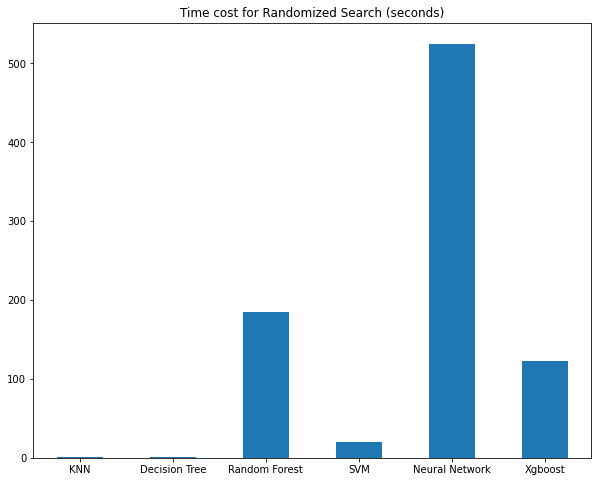

In [109]:
df_cmp.T["Time cost for Randomized Search (seconds)"].plot.bar(figsize=(10,8), rot=0, title="Time cost for Randomized Search (seconds)")

<AxesSubplot:title={'center':'R2 score for models with/without tuning'}>

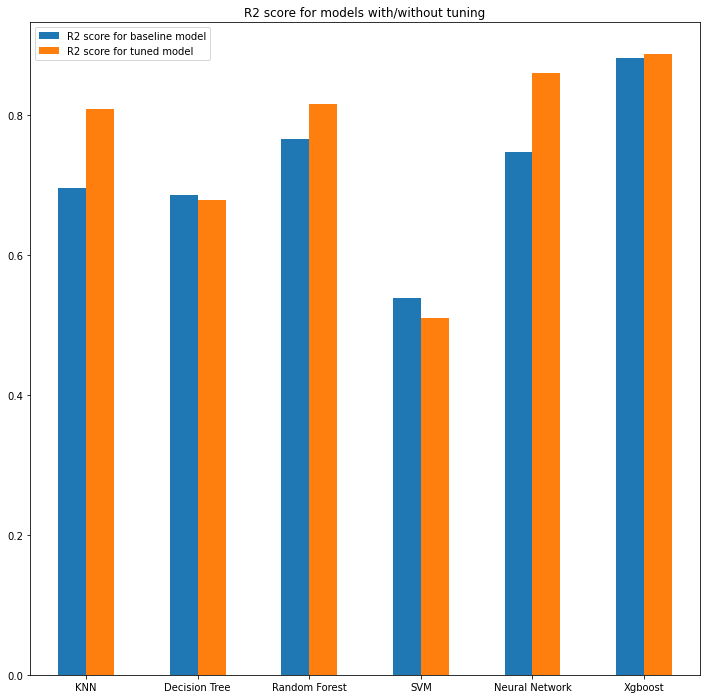

In [110]:
df_cmp.T[["R2 score for baseline model", "R2 score for tuned model"]].plot.bar(figsize=(12,12), rot=0, title="R2 score for models with/without tuning")

<font size=4>
        Combine both figures above, there're two choices after balancing time cost and prediction accuarcy:<br>
            &nbsp;&nbsp;&nbsp;&nbsp;1. KNN: more time saving <br>
            &nbsp;&nbsp;&nbsp;&nbsp;2. Xgboost: more accurate prediction <br>
</font>

In [104]:
y_predict = xgb_improve.predict(final_test)
output = pd.DataFrame()
output['Id'] = test_id
output['SalePrice'] = y_predict
output_path = parent_path + "/data/raw/submission.csv"
output.to_csv(output_path, index=False)

C:\Users\flywi\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
